In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Task1

def read_gff(file):
    #pd.set_option('display.max_rows', 10) # не работает для styler
    pd.set_option('styler.render.max_rows', 10)
    df = pd.read_table(file, header=0, names = ['seq_id', 'source', 'type', 'start', 'end', 
                                                                  'score', 'strand', 'phase', 'attributes'])

    dfs = df.style.set_table_styles([{"selector":"thead",
                                "props": [("background-color", "lavender"), ("border-bottom","1px solid lightgray"),
                                          ("font-size", "13px")]},
                            {"selector":"th.row_heading",
                                "props": [("background-color", "lavender"), ("border-bottom","1px solid lightgray"),
                                          ("font-size", "12px")]},
                            {"selector" :"td",
                                "props": [("border-bottom","1px solid lightgray"), ("background-color", "white")] }])

    return dfs

read_gff('rrna_annotation.gff')

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000,-,.,Name=23S_rRNA;product=23S ribosomal RNA
5,Reference_10,barrnap:0.9,rRNA,3633020,3634549,0.000000,-,.,Name=16S_rRNA;product=16S ribosomal RNA
6,Reference_10,barrnap:0.9,rRNA,6168837,6170367,0.000000,+,.,Name=16S_rRNA;product=16S ribosomal RNA
7,Reference_10,barrnap:0.9,rRNA,6170707,6173787,0.000000,+,.,Name=23S_rRNA;product=23S ribosomal RNA
8,Reference_10,barrnap:0.9,rRNA,6283193,6284716,0.000000,+,.,Name=16S_rRNA;product=16S ribosomal RNA
9,Reference_10,barrnap:0.9,rRNA,6285056,6288138,0.000000,+,.,Name=23S_rRNA;product=23S ribosomal RNA


In [3]:
def read_bed6(file):
    pd.set_option('styler.render.max_rows', 10)
    df = pd.read_table(file, header = None, names = ['chromosome', 'start', 'end', 'name', 'score', 'strand'] )
    dfb = df.style.set_table_styles([{"selector":"thead",
                                "props": [("background-color", "lavender"), ("border-bottom","1px solid lightgray"),
                                              ("font-size", "13px")]},
                            {"selector":"th.row_heading",
                                "props": [("background-color", "lavender"), ("border-bottom","1px solid lightgray"),
                                          ("font-size", "12px")]},
                            {"selector" :"td",
                                "props": [("border-bottom","1px solid lightgray"), ("background-color", "white")] }])
    
    return dfb

read_bed6('alignment.bed')

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
5,Reference_1,1763926,1764363,NODE_5666_length_436_cov_418.653543,0,-
6,Reference_1,1764308,1764418,NODE_19543_length_110_cov_1549.290909,0,+
7,Reference_1,1767018,1769623,NODE_1445_length_2603_cov_1135.593799,0,+
8,Reference_1,1769568,2034579,NODE_73_length_265111_cov_133.112263,60,+
9,Reference_1,2018035,2034640,NODE_778_length_16705_cov_121.032613,60,-


In [4]:
an = pd.read_table('rrna_annotation.gff', header=0, names = ['chromosome', 'source', 'type', 'start', 'end', 
                                                                  'score', 'strand', 'phase', 'attributes'])
an['attributes'] = an['attributes'].str.extract("([1-9]+S)")
an


,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [5]:
pd.set_option('display.max_rows', None)
dr = pd.pivot_table(an,
              index=['chromosome'], columns=['attributes'], values = ['type'], aggfunc=len)
dr


type            
attributes     16S   23S    5S
chromosome                    
Reference_1    2.0   2.0   2.0
Reference_10   5.0   5.0   NaN
Reference_11   2.0   2.0   2.0
Reference_12   2.0   2.0   2.0
Reference_13   4.0   4.0   4.0
Reference_14   4.0   4.0   5.0
Reference_15   8.0   8.0   8.0
Reference_16   7.0   7.0   8.0
Reference_17   7.0   7.0   8.0
Reference_18   2.0   3.0   2.0
Reference_19   7.0   7.0   8.0
Reference_2    5.0   5.0   5.0
Reference_20  11.0  10.0  10.0
Reference_21   1.0   1.0   1.0
Reference_22   4.0   4.0   4.0
Reference_23   1.0   1.0   1.0
Reference_24   4.0   4.0   4.0
Reference_25   3.0   3.0   3.0
Reference_26   4.0   4.0   4.0
Reference_3    2.0   2.0   2.0
Reference_4    8.0  10.0   6.0
Reference_5    6.0   6.0   6.0
Reference_6    2.0   2.0   2.0
Reference_7    9.0   8.0   8.0
Reference_8    2.0   2.0   NaN
Reference_9    6.0   6.0   6.0

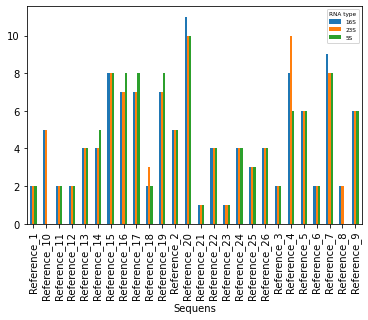

In [6]:
dr.plot.bar(xlabel="Sequens").legend(['16S','23S', '5S'], loc = 'upper right', fontsize = 'xx-small', 
                                     title = 'RNA type', title_fontsize = 'xx-small')

In [7]:
pd.set_option('display.max_rows', 10)
bed = pd.read_table('alignment.bed', header = None, names = ['chromosome', 'start', 'end', 'name', 'score', 'strand'] )


In [8]:
#pd.set_option('styler.render.max_rows', None)

ins = an.merge(bed, how = 'inner', left_on='chromosome', right_on='chromosome')
ins.loc[(ins['start_x'] > ins['start_y']) & (ins['end_x'] < ins['end_y'])!=True, 'start_x'] = 0
intersect = ins[ins['start_x'] != 0]
intersect.style.set_table_styles([{"selector":"thead",
                                "props": [("background-color", "lavender"), ("border-bottom","1px solid lightgray"),
                                          ("font-size", "13px")]},
                            {"selector":"th.row_heading",
                                "props": [("background-color", "lavender"), ("border-bottom","1px solid lightgray"),
                                          ("font-size", "12px")]},
                            {"selector" :"td",
                                "props": [("border-bottom","1px solid lightgray"), ("background-color", "white")] }])





,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,0.000000,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
269,Reference_11,barrnap:0.9,rRNA,2079929,2080038,0.000000,+,.,5S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
285,Reference_12,barrnap:0.9,rRNA,691826,693271,0.000000,+,.,16S,691101,697330,NODE_1092_length_6239_cov_1756.855110,21,+
308,Reference_12,barrnap:0.9,rRNA,693940,696699,0.000000,+,.,23S,691101,697330,NODE_1092_length_6239_cov_1756.855110,21,+
331,Reference_12,barrnap:0.9,rRNA,696970,697080,0.000000,+,.,5S,691101,697330,NODE_1092_length_6239_cov_1756.855110,21,+
363,Reference_12,barrnap:0.9,rRNA,2332870,2332980,0.000000,-,.,5S,2332619,2338846,NODE_1092_length_6239_cov_1756.855110,0,-


In [9]:
# Task2

dif = pd.read_table('diffexpr_data.tsv.gz')
dif.loc[(dif['logFC']<0) & (dif['log_pval'] >= 0.05), 'color'] = 'Significantly downregulated'
dif.loc[(dif['logFC']>0) & (dif['log_pval'] >= 0.05), 'color'] = 'Significantly upregulated'
dif.loc[(dif['logFC']<0) & (dif['log_pval'] < 0.05), 'color'] = 'Non-significantly downregulated'
dif.loc[(dif['logFC']>0) & (dif['log_pval'] < 0.05), 'color'] = 'Non-significantly upregulated'
dif.head()



,Sample,logFC,pval,pval_corr,log_pval,color
0,PNLIP,10.092524,0.659033,1.0,-0.0,Non-significantly upregulated
1,CELA2A,8.691414,0.582390,1.0,-0.0,Non-significantly upregulated
2,CLPS,8.054078,0.651733,1.0,-0.0,Non-significantly upregulated
3,MPO,7.817773,0.448334,1.0,-0.0,Non-significantly upregulated
4,AMY2A,7.285231,0.632441,1.0,-0.0,Non-significantly upregulated


In [10]:
from matplotlib.ticker import AutoMinorLocator

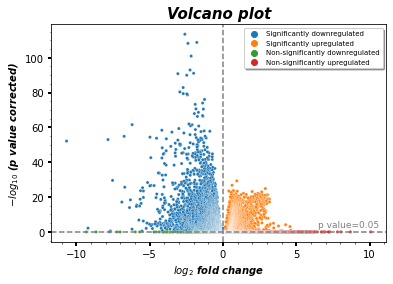

In [69]:
ax = sns.scatterplot(data =dif, x= 'logFC', y = 'log_pval', s = 10, hue = 'color',
                     hue_order = ['Significantly downregulated', 'Significantly upregulated',
                                       'Non-significantly downregulated', 'Non-significantly upregulated'])
ax.axhline(0.05, c = 'grey', ls = '--', lw = 1.5)
ax.axvline(0, c = 'grey', ls = '--', lw = 1.5)
ax.text(x=6.5, y=3, s='p value=0.05', fontsize=9, color='grey')


plt.xlabel(r'$log_2$ fold change', size=10, fontstyle='italic', weight =  'bold')
plt.ylabel(r'$-log_{10}$ (p value corrected)', size=10, fontstyle='italic', weight = 'bold')
plt.title('Volcano plot', size=15, fontstyle='italic', weight = 'bold')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='major', width=2)
ax.tick_params(which='minor', length=1.5)

#ax.spines['bottom'].set_linewidth(1)

ax.legend(loc = 'upper right', fontsize=7, shadow=True)


        

